### HW3 Мельчук Андрей. Практическое задание.

#### 1. Попробуйте обучить нейронную сеть на TensorFlow 2 на любом датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?


#### 2. Поработайте с документацией TensorFlow2. Найдите полезные команды не разобранные на уроке.

#### Классификации положительных и отрицательных отзывов

Решение взято из документации по TF,
https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
и модифицировано.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [137]:
import tensorflow_datasets as tfds
# tfds.disable_progress_bar()

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow_hub as hub

In [4]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.1.0
Eager mode:  True
Hub version:  0.8.0
GPU is NOT AVAILABLE


In [140]:
tf.config.list_physical_devices('GPU')

[]

In [141]:
(train_data, validation_data, test_data), metadata = tfds.load(
    name="imdb_reviews", 
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True)

In [142]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'This is a big step down after the surprisingly enjoyable original. This sequel isn\'t nearly as fun as part one, and it instead spends too much time on plot development. Tim Thomerson is still the best thing about this series, but his wisecracking is toned down in this entry. The performances are all adequate, but this time the script lets us down. The action is merely routine and the plot is only mildly interesting, so I need lots of silly laughs in order to stay entertained during a "Trancers" movie. Unfortunately, the laughs are few and far between, and so, this film is watchable at best.',
       b"Perhaps because I was so young, innocent and BRAINWASHED when I saw it, this movie was the cause of many sleepless nights for me. I haven't seen it since I was in seventh grade at a Presbyterian school, so I am not sure what effect it would have on me now. However, I will say that it left an impression on me... and most of my friends

In [143]:
test_examples_batch, test_labels_batch = next(iter(test_data.batch(10)))
test_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'First things first, the female lead is too gorgeous to be missed. Now actress Wang Zu Xian, the one who played Xiao Qian in the movie, is 42 years old and well aged. It\'s always good to review these glorious times when seeing old-school HongKong productions like this.<br /><br />The movie is one of the most influential titles made in 1980s. The art set decoration and other aesthetic facets are all mesmerizing. More fantastically the movie had a total black humorous undertone in it. It feels like a horror movie but ultimately it\'s not scaring, but only fun.<br /><br />I had the experience of translating the second script of "A Chinese Ghotst Story", and I thought that script was a decent write. However when I saw the movie, I firstly was disappointed in seeing the movie different from the script, like in a smaller scale and involving more comic roles. However, it turned out to be better executed in terms of being entertaining.<br 

In [144]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)>

In [145]:
test_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)>

In [146]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 2.209591  , -2.7093675 ,  3.6802928 , -1.0291991 , -4.1671185 ,
        -2.4566064 , -2.2519937 , -0.36589956,  1.9485804 , -3.1104462 ,
        -2.4610963 ,  1.3139242 , -0.9161584 , -0.16625322, -3.723651  ,
         1.8498232 ,  3.499562  , -1.2373022 , -2.8403084 , -1.213074  ],
       [ 1.9055302 , -4.11395   ,  3.6038654 ,  0.28555924, -4.658998  ,
        -5.5433393 , -3.2735848 ,  1.9235417 ,  3.8461034 ,  1.5882455 ,
        -2.64167   ,  0.76057523, -0.14820506,  0.9115291 , -6.45758   ,
         2.3990374 ,  5.0985413 , -3.2776263 , -3.2652326 , -1.2345369 ],
       [ 3.6510668 , -4.7066135 ,  4.71003   , -1.7002777 , -3.7708545 ,
        -3.709126  , -4.222776  ,  1.946586  ,  6.1182513 , -2.7392752 ,
        -5.4384456 ,  2.7078724 , -2.1263676 , -0.7084146 , -5.893995  ,
         3.1602864 ,  3.8389287 , -3.318196  , -5.1542974 , -2.4051712 ]],
      dtype=float32)>

In [147]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_42 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 400,241
Trainable params: 400,241
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [149]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
40/40 [==============================] - 3s 78ms/step - loss: 1.5361 - accuracy: 0.4964 - val_loss: 0.7368 - val_accuracy: 0.4804
Epoch 2/20
40/40 [==============================] - 2s 58ms/step - loss: 0.7030 - accuracy: 0.5336 - val_loss: 0.6691 - val_accuracy: 0.5904
Epoch 3/20
40/40 [==============================] - 2s 60ms/step - loss: 0.6517 - accuracy: 0.6188 - val_loss: 0.6280 - val_accuracy: 0.6496
Epoch 4/20
40/40 [==============================] - 2s 58ms/step - loss: 0.6179 - accuracy: 0.6716 - val_loss: 0.5968 - val_accuracy: 0.6916
Epoch 5/20
40/40 [==============================] - 2s 57ms/step - loss: 0.5862 - accuracy: 0.7040 - val_loss: 0.5713 - val_accuracy: 0.7168
Epoch 6/20
40/40 [==============================] - 2s 59ms/step - loss: 0.5606 - accuracy: 0.7269 - val_loss: 0.5467 - val_accuracy: 0.7364
Epoch 7/20
40/40 [==============================] - 2s 58ms/step - loss: 0.5335 - accuracy: 0.7464 - val_loss: 0.5209 - val_accuracy: 0.7544
Epoch 8/20
40

In [150]:
results = model.evaluate(test_data.batch(512), verbose=2)
for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

loss: 0.295
accuracy: 0.875


### Анализ

    Получили модель классификации положительных и отрицательных отзывов.  ( 0 - отр, 1 - положительный отзывы)  

Визуализируем loss и acc для удобства используя History() callback из fit

In [151]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()



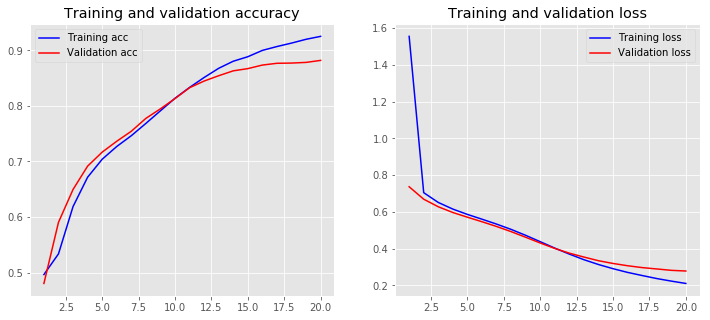

In [152]:
plot_history(history)

    Параметры слоев подобраны оптимально
    20 эпох достаточно, кривая accuracy плавно растет
    Переобучения нет, тк кривая loss все время опускается
    Положительно на точность повлияло заданное количества эпох.     
    Для повышения точности использован слой из Tensor hub, который основан на вставке текста на основе матричной факторизации Swivel с предварительно созданным OOV (Out-Of-Vocabulary). Он делает карты из текста, на выходе 20-мерные векторы.   
    (Text embedding based on Swivel co-occurrence matrix factorization with pre-built OOV. Maps from text to 20-dimensional embedding vectors.)

#### 2. Новая фича из документации, 

Можно делиться моделями через TensorFlow Hub 

    embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
    hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

TensorFlow Hub
- это библиотека для публикации, обнаружения и использования повторно используемых частей моделей машинного обучения.